In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch as th

## Load data

In [2]:
loc = "../local_data/circuit"

In [3]:
results_crx_1 = th.load(f"{loc}/result1_6q_crx.pt")
results_crx_2 = th.load(f"{loc}/result2_6q_crx.pt")

results_cnot_1 = th.load(f"{loc}/result1_6q_cnot.pt")
results_cnot_2 = th.load(f"{loc}/result2_6q_cnot.pt")

In [4]:
layers_crx = np.arange(2, 25, 2)
layers_cnot = np.arange(2, 15, 2)

## CRX Gates

In [5]:
var1_crx = []
var2_crx = []
var0_crx = []

for l in range(len(layers_crx)):
    var1_crx.append(th.std(results_crx_1[l]))
    var2_crx.append(th.std(th.mean(results_crx_2[l], dim=1)).cpu())
    var0_crx.append(th.std(results_crx_2[l][:,0]).cpu())

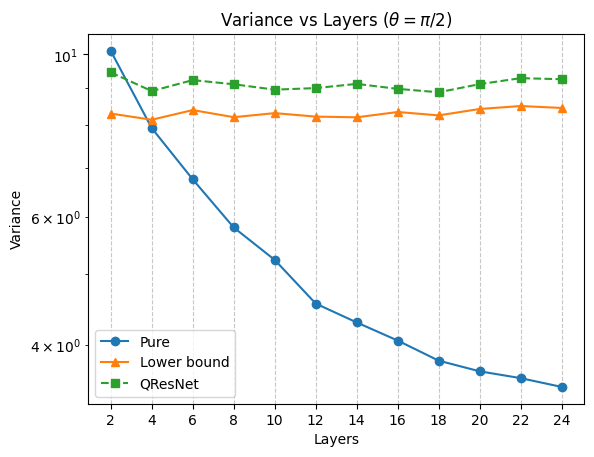

In [6]:
plt.plot(layers_crx, var1_crx, marker='o', label='Pure')
plt.plot(layers_crx, var2_crx, marker='^', label='Lower bound')
plt.plot(layers_crx, var0_crx, marker='s', label='QResNet', linestyle='--')
plt.xlabel('Layers')
plt.grid(axis='x', which='both', linestyle='--', alpha=0.7)
plt.xticks(layers_crx)
plt.yscale('log')
plt.ylabel('Variance')
plt.title(r'Variance vs Layers ($\theta=\pi/2$)')
plt.legend()
plt.show()

## CNOT Gates

In [7]:
var1_cnot = []
var2_cnot = []
var0_cnot = []

for l in range(len(layers_cnot)):
    var1_cnot.append(th.std(results_cnot_1[l]))
    var2_cnot.append(th.std(th.mean(results_cnot_2[l], dim=1)).cpu())
    var0_cnot.append(th.std(results_cnot_2[l][:,0]).cpu())

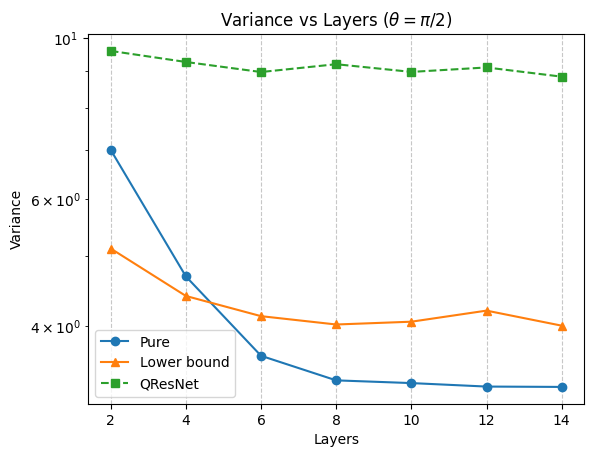

In [8]:
plt.plot(layers_cnot, var1_cnot, marker='o', label='Pure')
plt.plot(layers_cnot, var2_cnot, marker='^', label='Lower bound')
plt.plot(layers_cnot, var0_cnot, marker='s', label='QResNet', linestyle='--')
plt.xlabel('Layers')
plt.grid(axis='x', which='both', linestyle='--', alpha=0.7)
plt.xticks(layers_cnot)
plt.ylabel('Variance')
plt.yscale('log')
plt.title(r'Variance vs Layers ($\theta=\pi/2$)')
plt.legend()
plt.show()